<a href="https://colab.research.google.com/github/RientArlCroud/challenge3-analisis-de-datos/blob/main/Challenge_3_An%C3%A1lisis_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Challenge 2 – Análisis de Datos | Oracle ONE Alura – G9

## 📌 Contexto
Este cuaderno de colab es parte del segundo challenge del programa **Oracle ONE - Alura Latam**, el objetivo principal es aplicar el proceso de ETL sobre un conjunto de datos de la empresa de TelecomX y desarrollar un reporte basado en los datos procesados.


In [174]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 📥 Extracción

In [3]:
df = pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


* Debemos normalizar 4 columnas, utilizando el método de pandas pd.json_normalize()
* Este método entrega un DF por aparte con los datos de la columna normalizada, estos serán agregados al DF original utilizando el método .concat(), en esa misma línea de código aprovecharemos para dropear la columna que ya normalizamos.
* En el desarrollo de la normalización hemos decidido agregar como prefijo a cada nueva columna, el nombre de la columna a la que pertenecía, para nombrar un ejemplo en la columna 'customer' la primera key es 'gender', que se mantendrá por ahora como 'customer_gender'

In [4]:
df_customer = pd.json_normalize(df['customer'])
df_customer = df_customer.add_prefix('customer_')
df_customer

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
df = pd.concat([df, df_customer], axis=1)
df = df.drop(columns=['customer'])
df

,customerID,Churn,phone,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


In [6]:
df_phone = pd.json_normalize(df['phone'])
df_phone = df_phone.add_prefix('phone_')
df_phone

,phone_PhoneService,phone_MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [7]:
df = pd.concat([df, df_phone], axis=1)
df = df.drop(columns=['phone'])
df

,customerID,Churn,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No


In [8]:
df_internet = pd.json_normalize(df['internet'])
df_internet = df_internet.add_prefix('internet_')
df_internet

,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [9]:
df = pd.concat([df, df_internet], axis=1)
df = df.drop(columns=['internet'])
df

,customerID,Churn,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,"{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [10]:
df_account = pd.json_normalize(df['account'])
df_account = df_account.add_prefix('account_')
df_account

,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [11]:
df = pd.concat([df, df_account], axis=1)
df = df.drop(columns=['account'])
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## 🔄 Transformacion

* Conociendo el conjunto de datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [13]:
df.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


* Comprabación de incoherencia en los datos

In [14]:
df['phone_MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [15]:
df['account_PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [16]:
df['account_Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [17]:
df['internet_InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df['customerID'].value_counts().sum()

np.int64(7267)

* Manejo de incosistencias

En el proceso de manera incosistencias luego de algunas pruebas realizadas al tratar de convertir los datos de la columna que contiene el total, notamos que existen valores string ' ' (vacios) que deben ser convertidos a nan para poder ejecutar el código que convierte a float64, sin embargo al analizar esas casillas que son vacias notamos que corresponden a clientes que aún no han completado un mes con el servicio, por lo que declaramos que estos valores no serán nan sino 0

In [19]:
pd.set_option('display.max_columns', None)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [20]:
df.sample(20)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
4011,5482-VXSXJ,No,Male,0,No,No,22,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.20,2157.3
6249,8601-QACRS,Yes,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
501,0708-LGSMF,No,Male,0,Yes,No,13,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,65.85,902.25
4176,5726-CVNYA,No,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.6
2253,3146-JTQHR,No,Male,0,Yes,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.60,189.45
4577,6270-OMFIW,Yes,Male,0,Yes,No,60,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,94.40,5610.25
5304,7244-QWYHG,No,Male,0,Yes,No,50,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),44.45,2188.45
912,1289-RKJJR,,Male,0,No,No,28,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,91.00,2626.15
7042,9700-ZCLOT,No,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,32.7
2385,3327-YBAKM,No,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,96.90,6314.35


In [21]:
display(df[df['account_Charges.Total'] == ' '])

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [22]:
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'].str.strip(), errors='coerce')

In [23]:
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0)

In [24]:
df['account_Charges.Total'].isnull().sum()

np.int64(0)

Vamos a proceder a limpiar los nombres de las columnas para tener un mejor ambiente a la hora de trabajar

In [25]:
df.columns = (
    df.columns
    .str.replace('.', '_', regex=False)
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.lower()
)
df.columns

Index(['customer_id', 'churn', 'customer_gender', 'customer_senior_citizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phone_service', 'phone_multiple_lines',
       'internet_internet_service', 'internet_online_security',
       'internet_online_backup', 'internet_device_protection',
       'internet_tech_support', 'internet_streaming_tv',
       'internet_streaming_movies', 'account_contract',
       'account_paperless_billing', 'account_payment_method',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

Revisando si los ID deben ser corregidos

In [26]:
df['customer_id'].str.len().value_counts()

,count
customer_id,
10,7267


Aquí podemos ver que todos los string de los códigos son igual ya que poseen la misma cantidad de caracteres, no hay espacios vacios y por ende no deben ser limpiados

* Columna de cuentas diarias (opcional)

In [27]:
df['cuentas_diarias'] = df['account_charges_monthly'] / 30
df['cuentas_diarias']

,cuentas_diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


## 📤📊 Carga y Análisis

### * Análisis descriptivo

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7267 non-null   object 
 1   churn                       7267 non-null   object 
 2   customer_gender             7267 non-null   object 
 3   customer_senior_citizen     7267 non-null   int64  
 4   customer_partner            7267 non-null   object 
 5   customer_dependents         7267 non-null   object 
 6   customer_tenure             7267 non-null   int64  
 7   phone_phone_service         7267 non-null   object 
 8   phone_multiple_lines        7267 non-null   object 
 9   internet_internet_service   7267 non-null   object 
 10  internet_online_security    7267 non-null   object 
 11  internet_online_backup      7267 non-null   object 
 12  internet_device_protection  7267 non-null   object 
 13  internet_tech_support       7267 

In [29]:
df.describe()

,customer_senior_citizen,customer_tenure,account_charges_monthly,account_charges_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### * Distribución de evasión

In [30]:
df['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [31]:
df['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [32]:
df[df['churn'] == '']

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [33]:
import numpy as np
df.loc[df['churn'] == '', 'churn'] = np.nan

<Axes: xlabel='churn'>

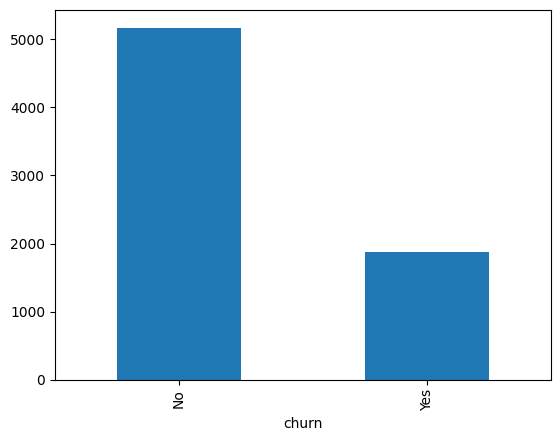

In [34]:
df['churn'].value_counts().plot(kind='bar')

### * Recuento de evasión por variables catégoricas

####**Evasión & Género**


In [35]:
df.groupby('churn')[['customer_gender']].value_counts()

churn  customer_gender
No     Male               2625
       Female             2549
Yes    Female              939
       Male                930
Name: count, dtype: int64

Conteo

In [36]:
conteo = df.groupby('customer_gender')['churn'].value_counts().reset_index(name='count')
conteo

,customer_gender,churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


Porcentajes

In [37]:
porcentajes = df.groupby('customer_gender')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes

,customer_gender,churn,percentage
0,Female,No,73.08
1,Female,Yes,26.92
2,Male,No,73.84
3,Male,Yes,26.16


Combinados

In [38]:
churn_by_gender = conteo.merge(
    porcentajes,
    on=['customer_gender', 'churn']
)
churn_by_gender

,customer_gender,churn,count,percentage
0,Female,No,2549,73.08
1,Female,Yes,939,26.92
2,Male,No,2625,73.84
3,Male,Yes,930,26.16


#### **Evasión & Adulto mayor**





In [39]:
df.groupby('churn')['customer_senior_citizen'].value_counts()

churn  customer_senior_citizen
No     0                          4508
       1                           666
Yes    0                          1393
       1                           476
Name: count, dtype: int64

Conteo

In [40]:
conteo_1 = df.groupby('customer_senior_citizen')['churn'].value_counts().reset_index(name='count')
conteo_1

,customer_senior_citizen,churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


Porcentajes

In [41]:
porcentajes_1 = df.groupby('customer_senior_citizen')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_1

,customer_senior_citizen,churn,percentage
0,0,No,76.39
1,0,Yes,23.61
2,1,No,58.32
3,1,Yes,41.68


Combinados

In [42]:
churn_by_senior_citizen = conteo_1.merge(
    porcentajes_1,
    on=['customer_senior_citizen', 'churn']
)
churn_by_senior_citizen

,customer_senior_citizen,churn,count,percentage
0,0,No,4508,76.39
1,0,Yes,1393,23.61
2,1,No,666,58.32
3,1,Yes,476,41.68


#### **Evasión & Tener dependientes**

In [43]:
df.groupby('churn')[['customer_dependents']].value_counts()

churn  customer_dependents
No     No                     3390
       Yes                    1784
Yes    No                     1543
       Yes                     326
Name: count, dtype: int64

Conteo

In [44]:
conteo_2 = df.groupby('customer_dependents')['churn'].value_counts().reset_index(name='count')
conteo_2

,customer_dependents,churn,count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


Porcentajes

In [45]:
porcentajes_2 = df.groupby('customer_dependents')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_2

,customer_dependents,churn,percentage
0,No,No,68.72
1,No,Yes,31.28
2,Yes,No,84.55
3,Yes,Yes,15.45


Combinados

In [46]:
churn_by_dependents = conteo_2.merge(
    porcentajes_2,
    on=['customer_dependents', 'churn']
)
churn_by_dependents


,customer_dependents,churn,count,percentage
0,No,No,3390,68.72
1,No,Yes,1543,31.28
2,Yes,No,1784,84.55
3,Yes,Yes,326,15.45


#### **Evasión & Tipo de contrato**


In [47]:
df.groupby('churn')[['account_contract']].value_counts()

churn  account_contract
No     Month-to-month      2220
       Two year            1647
       One year            1307
Yes    Month-to-month      1655
       One year             166
       Two year              48
Name: count, dtype: int64

Conteo

In [48]:
conteo_3 = df.groupby('account_contract')['churn'].value_counts().reset_index(name='count')
conteo_3

,account_contract,churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


Porcentajes

In [49]:
porcentajes_3 = df.groupby('account_contract')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_3

,account_contract,churn,percentage
0,Month-to-month,No,57.29
1,Month-to-month,Yes,42.71
2,One year,No,88.73
3,One year,Yes,11.27
4,Two year,No,97.17
5,Two year,Yes,2.83


Combinados

In [50]:
churn_by_contract = conteo_3.merge(
    porcentajes_3,
    on=['account_contract', 'churn']
)
churn_by_contract

,account_contract,churn,count,percentage
0,Month-to-month,No,2220,57.29
1,Month-to-month,Yes,1655,42.71
2,One year,No,1307,88.73
3,One year,Yes,166,11.27
4,Two year,No,1647,97.17
5,Two year,Yes,48,2.83


#### **Evasión & Método de pago**

In [51]:
df.groupby('churn')[['account_payment_method']].value_counts()

churn  account_payment_method   
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64

Conteo

In [52]:
conteo_4 = df.groupby('account_payment_method')['churn'].value_counts().reset_index(name='count')
conteo_4

,account_payment_method,churn,count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


Porcentajes

In [53]:
porcentajes_4 = df.groupby('account_payment_method')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_4

,account_payment_method,churn,percentage
0,Bank transfer (automatic),No,83.29
1,Bank transfer (automatic),Yes,16.71
2,Credit card (automatic),No,84.76
3,Credit card (automatic),Yes,15.24
4,Electronic check,No,54.71
5,Electronic check,Yes,45.29
6,Mailed check,No,80.89
7,Mailed check,Yes,19.11


Combinados

In [54]:
churn_by_payment = conteo_4.merge(
    porcentajes_4,
    on=['account_payment_method', 'churn']
)
churn_by_payment


,account_payment_method,churn,count,percentage
0,Bank transfer (automatic),No,1286,83.29
1,Bank transfer (automatic),Yes,258,16.71
2,Credit card (automatic),No,1290,84.76
3,Credit card (automatic),Yes,232,15.24
4,Electronic check,No,1294,54.71
5,Electronic check,Yes,1071,45.29
6,Mailed check,No,1304,80.89
7,Mailed check,Yes,308,19.11


#### Evasión & Servicio de Internet

In [55]:
df.groupby('churn')[['internet_internet_service']].value_counts()

churn  internet_internet_service
No     DSL                          1962
       Fiber optic                  1799
       No                           1413
Yes    Fiber optic                  1297
       DSL                           459
       No                            113
Name: count, dtype: int64

conteo


In [56]:
conteo_5 = df.groupby('internet_internet_service')['churn'].value_counts().reset_index(name='count')
conteo_5

,internet_internet_service,churn,count
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


porcentajes

In [57]:
porcentajes_5 = df.groupby('internet_internet_service')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_5

,internet_internet_service,churn,percentage
0,DSL,No,81.04
1,DSL,Yes,18.96
2,Fiber optic,No,58.11
3,Fiber optic,Yes,41.89
4,No,No,92.60
5,No,Yes,7.40


combinados

In [58]:
churn_by_internet_service = conteo_5.merge(
    porcentajes_5,
    on=['internet_internet_service', 'churn']
)
churn_by_internet_service

,internet_internet_service,churn,count,percentage
0,DSL,No,1962,81.04
1,DSL,Yes,459,18.96
2,Fiber optic,No,1799,58.11
3,Fiber optic,Yes,1297,41.89
4,No,No,1413,92.60
5,No,Yes,113,7.40


#### Evasión & Facturación sin papel

In [59]:
df.groupby('churn')[['account_paperless_billing']].value_counts()

churn  account_paperless_billing
No     Yes                          2771
       No                           2403
Yes    Yes                          1400
       No                            469
Name: count, dtype: int64

conteo

In [60]:
conteo_6 = df.groupby('account_paperless_billing')['churn'].value_counts().reset_index(name='count')
conteo_6

,account_paperless_billing,churn,count
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


porcentajes

In [61]:
porcentajes_6 = df.groupby('account_paperless_billing')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_6

,account_paperless_billing,churn,percentage
0,No,No,83.67
1,No,Yes,16.33
2,Yes,No,66.43
3,Yes,Yes,33.57


combinadas

In [62]:
churn_by_paperless_billing = conteo_6.merge(
    porcentajes_6,
    on=['account_paperless_billing', 'churn']
)
churn_by_paperless_billing

,account_paperless_billing,churn,count,percentage
0,No,No,2403,83.67
1,No,Yes,469,16.33
2,Yes,No,2771,66.43
3,Yes,Yes,1400,33.57


### * Conteo de evasión por variables numéricas

In [63]:
df

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#### Tenure

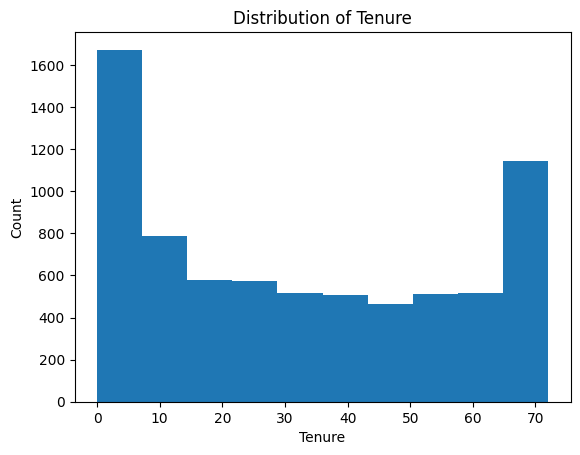

In [64]:
import matplotlib.pyplot as plt

plt.hist(df['customer_tenure'])
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

In [65]:
df['customer_tenure'].describe()

,customer_tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


<Axes: xlabel='churn', ylabel='customer_tenure'>

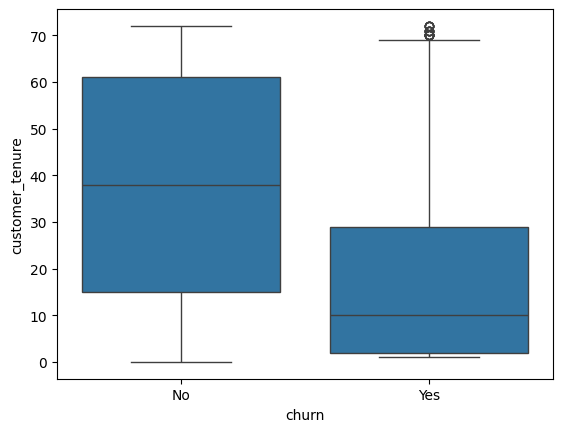

In [66]:
import seaborn as sns
sns.boxplot(x='churn', y='customer_tenure', data=df)

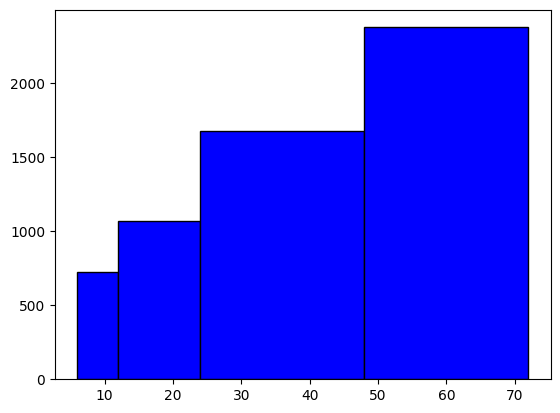

In [67]:
bins = [6, 12, 24, 48, 72]
plt.hist(df['customer_tenure'],
         bins=bins,
         edgecolor='black',
         color='blue',
         )
plt.show()

In [68]:
tenure_yes = df.loc[df['churn'] == 'Yes', 'customer_tenure']
tenure_no  = df.loc[df['churn'] == 'No',  'customer_tenure']

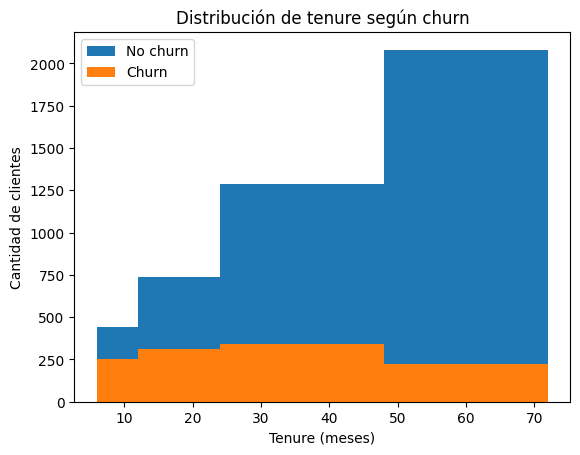

In [69]:
plt.hist(tenure_no, bins=bins, alpha=1, label='No churn')
plt.hist(tenure_yes, bins=bins, alpha=1, label='Churn')

plt.xlabel('Tenure (meses)')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de tenure según churn')
plt.legend()

plt.show()


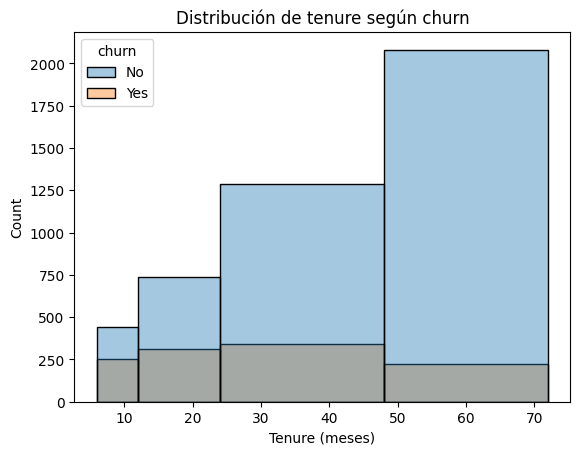

In [70]:
sns.histplot(
    data=df,
    x='customer_tenure',
    hue='churn',
    bins=bins,
    multiple='layer',
    alpha=0.4
)

plt.xlabel('Tenure (meses)')
plt.title('Distribución de tenure según churn')
plt.show()


In [71]:
df['tenure_group'] = pd.cut(
    df['customer_tenure'],
    bins=[0, 6, 12, 24, 48, 72])
df

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias,tenure_group
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,"(6, 12]"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,"(6, 12]"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,"(0, 6]"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,"(12, 24]"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,"(0, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333,"(12, 24]"
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,"(12, 24]"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,"(0, 6]"
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,"(48, 72]"


In [72]:
df_tenure_A = df['tenure_group'].value_counts().reset_index()
df_tenure_A.rename(columns={'count': 'total_customers'}, inplace=True)
df_tenure_A

,tenure_group,total_customers
0,"(48, 72]",2309
1,"(24, 48]",1648
2,"(0, 6]",1525
3,"(12, 24]",1045
4,"(6, 12]",729


In [73]:
df_tenure_B = df.groupby('tenure_group')['churn'].value_counts().reset_index()
df_tenure_B

/tmp/ipython-input-3650485247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tenure_B = df.groupby('tenure_group')['churn'].value_counts().reset_index()


,tenure_group,churn,count
0,"(0, 6]",Yes,784
1,"(0, 6]",No,686
2,"(6, 12]",No,452
3,"(6, 12]",Yes,253
4,"(12, 24]",No,730
5,"(12, 24]",Yes,294
6,"(24, 48]",No,1269
7,"(24, 48]",Yes,325
8,"(48, 72]",No,2026
9,"(48, 72]",Yes,213


In [74]:
df_tenure_B = df_tenure_B.loc[df_tenure_B['churn']=='Yes']
df_tenure_B.rename(columns={'count': 'churned_customers'}, inplace=True)
df_tenure_B

/tmp/ipython-input-2275855898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tenure_B.rename(columns={'count': 'churned_customers'}, inplace=True)


,tenure_group,churn,churned_customers
0,"(0, 6]",Yes,784
3,"(6, 12]",Yes,253
5,"(12, 24]",Yes,294
7,"(24, 48]",Yes,325
9,"(48, 72]",Yes,213


In [75]:
df_churn_rate = df_tenure_A.merge(
    df_tenure_B,
    on='tenure_group'
)
df_churn_rate['churn_rate']=(df_churn_rate['churned_customers']/df_churn_rate['total_customers']).multiply(100).round(2)
df_churn_rate

,tenure_group,total_customers,churn,churned_customers,churn_rate
0,"(48, 72]",2309,Yes,213,9.22
1,"(24, 48]",1648,Yes,325,19.72
2,"(0, 6]",1525,Yes,784,51.41
3,"(12, 24]",1045,Yes,294,28.13
4,"(6, 12]",729,Yes,253,34.71


#### Charges Monthly

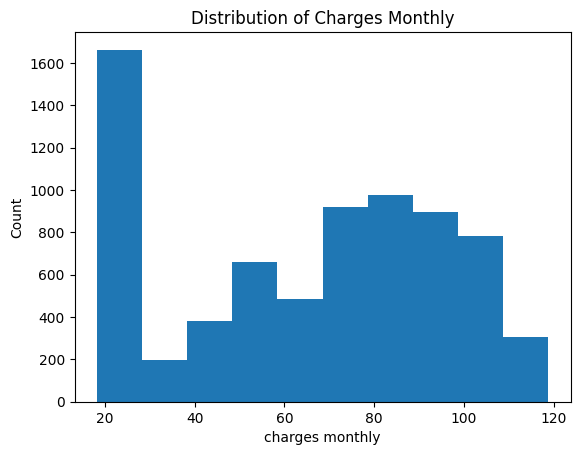

In [76]:
import matplotlib.pyplot as plt

plt.hist(df['account_charges_monthly'])
plt.xlabel('charges monthly')
plt.ylabel('Count')
plt.title('Distribution of Charges Monthly')
plt.show()

In [77]:
df['account_charges_monthly'].describe()

,account_charges_monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


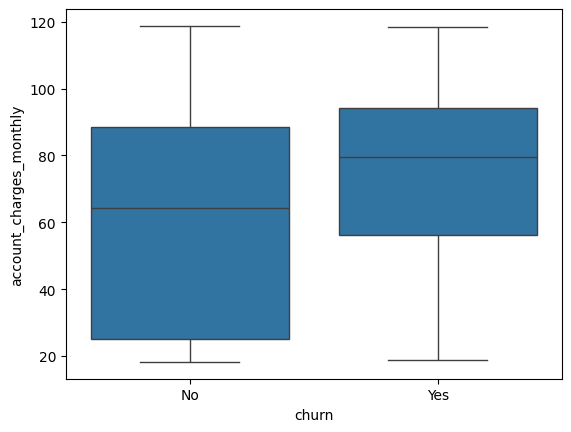

In [78]:
sns.boxplot(x='churn', y='account_charges_monthly', data=df);

In [79]:
df['account_charges_monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

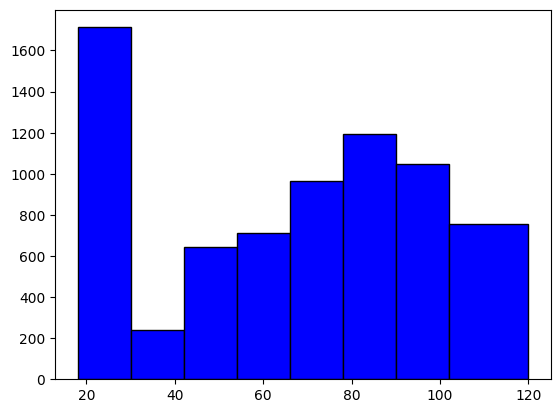

In [80]:
bins = [18, 30, 42, 54, 66, 78, 90, 102, 120]
plt.hist(df['account_charges_monthly'],
         bins=bins,
         edgecolor='black',
         color='blue',
         )
plt.show()

In [81]:
charges_monthly_yes = df.loc[df['churn'] == 'Yes', 'account_charges_monthly']
charges_monthly_no  = df.loc[df['churn'] == 'No',  'account_charges_monthly']

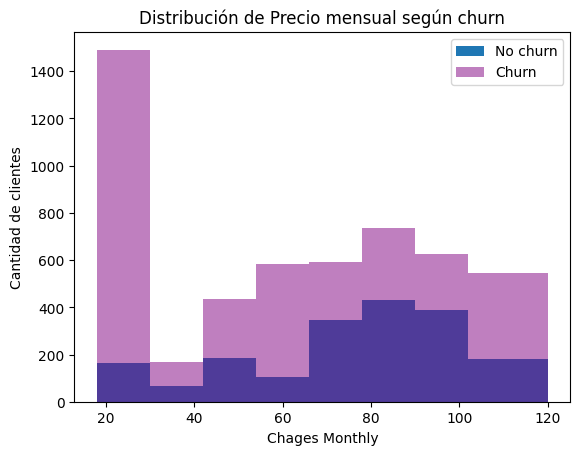

In [82]:
plt.hist(charges_monthly_yes, bins=bins, alpha=1, label='No churn')
plt.hist(charges_monthly_no, bins=bins, alpha=0.5, label='Churn', color='purple')

plt.xlabel('Chages Monthly')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de Precio mensual según churn')
plt.legend()

plt.show()

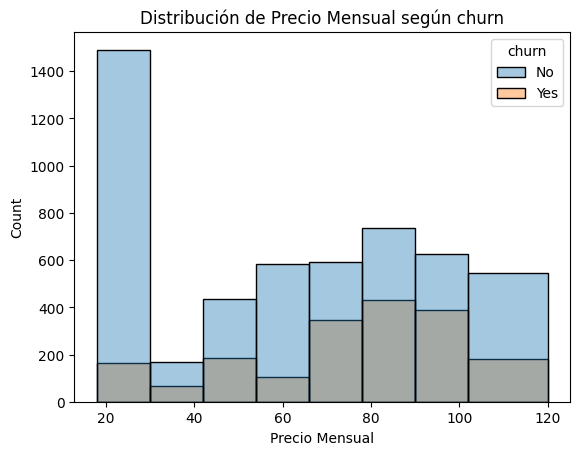

In [83]:
sns.histplot(
    data=df,
    x='account_charges_monthly',
    hue='churn',
    bins=bins,
    multiple='layer',
    alpha=0.4
)

plt.xlabel('Precio Mensual')
plt.title('Distribución de Precio Mensual según churn')
plt.show()

#### Churn Rate by charges_monthly

In [84]:
df['charges_monthly_group'] = pd.cut(
    df['account_charges_monthly'],
    bins=[17, 30, 42, 54, 66, 78, 90, 102, 120])

In [85]:
df_monthly_A = df['charges_monthly_group'].value_counts().reset_index()
df_monthly_A.rename(columns={'count': 'total_customers'}, inplace=True)
df_monthly_A

,charges_monthly_group,total_customers
0,"(17, 30]",1713
1,"(78, 90]",1195
2,"(90, 102]",1044
3,"(66, 78]",964
4,"(102, 120]",754
5,"(54, 66]",712
6,"(42, 54]",644
7,"(30, 42]",241


In [86]:
df_monthly_B = df.groupby('charges_monthly_group')['churn'].value_counts().reset_index()
df_monthly_B = df_monthly_B.loc[df_monthly_B['churn']=='Yes']
df_monthly_B.rename(columns={'count': 'churned_customers'}, inplace=True)
df_monthly_B

/tmp/ipython-input-2593904732.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly_B = df.groupby('charges_monthly_group')['churn'].value_counts().reset_index()


,charges_monthly_group,churn,churned_customers
1,"(17, 30]",Yes,162
3,"(30, 42]",Yes,66
5,"(42, 54]",Yes,187
7,"(54, 66]",Yes,106
9,"(66, 78]",Yes,346
11,"(78, 90]",Yes,432
13,"(90, 102]",Yes,389
15,"(102, 120]",Yes,181


In [87]:
df_monthly_churn_rate = df_monthly_A.merge(
    df_monthly_B,
    on='charges_monthly_group'
)
df_monthly_churn_rate

,charges_monthly_group,total_customers,churn,churned_customers
0,"(17, 30]",1713,Yes,162
1,"(78, 90]",1195,Yes,432
2,"(90, 102]",1044,Yes,389
3,"(66, 78]",964,Yes,346
4,"(102, 120]",754,Yes,181
5,"(54, 66]",712,Yes,106
6,"(42, 54]",644,Yes,187
7,"(30, 42]",241,Yes,66


In [88]:
df_monthly_churn_rate['churn_rate']=(df_monthly_churn_rate['churned_customers']/df_monthly_churn_rate['total_customers']).multiply(100).round(2)
df_monthly_churn_rate

,charges_monthly_group,total_customers,churn,churned_customers,churn_rate
0,"(17, 30]",1713,Yes,162,9.46
1,"(78, 90]",1195,Yes,432,36.15
2,"(90, 102]",1044,Yes,389,37.26
3,"(66, 78]",964,Yes,346,35.89
4,"(102, 120]",754,Yes,181,24.01
5,"(54, 66]",712,Yes,106,14.89
6,"(42, 54]",644,Yes,187,29.04
7,"(30, 42]",241,Yes,66,27.39


#### Total_charges

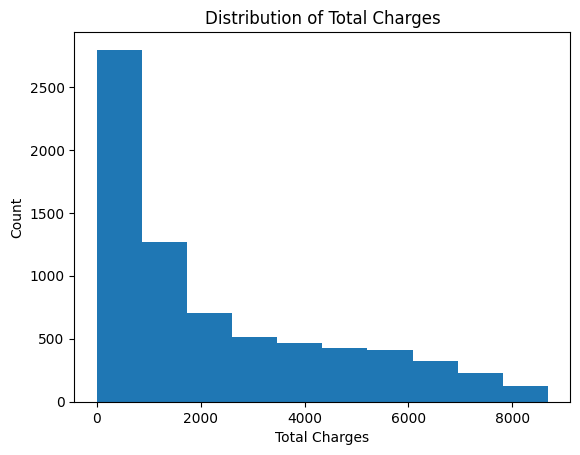

In [89]:
plt.hist(df['account_charges_total'])

plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Charges')
plt.show()

In [90]:
df['account_charges_total'].describe()

,account_charges_total
count,7267.000000
mean,2277.182035
std,2268.648587
min,0.000000
25%,396.200000
50%,1389.200000
75%,3778.525000
max,8684.800000


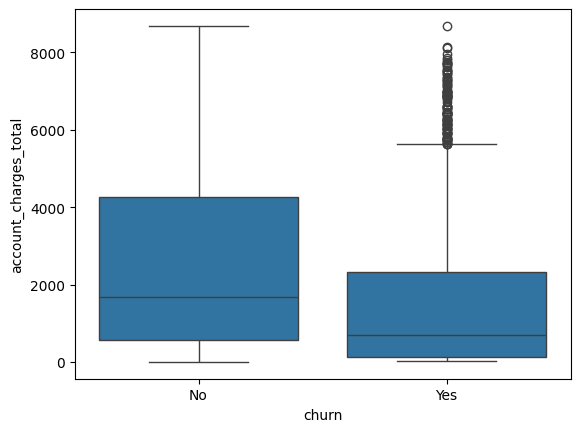

In [91]:
sns.boxplot(x='churn', y='account_charges_total', data=df);

In [92]:
df_lost_revenue = df.groupby('churn').size().reset_index(name='total_customers')
df_lost_revenue

,churn,total_customers
0,No,5174
1,Yes,1869


In [93]:
total_clientes = df.shape[0]
df_lost_revenue['customers_pctg'] = (df_lost_revenue['total_customers']/total_clientes * 100).round(2)
df_lost_revenue

,churn,total_customers,customers_pctg
0,No,5174,71.20
1,Yes,1869,25.72


In [94]:
total_charges = df.groupby('churn')['account_charges_total'].sum().reset_index(name='total_charges')
df_lost_revenue = df_lost_revenue.merge(total_charges, on='churn')
df_lost_revenue

,churn,total_customers,customers_pctg,total_charges
0,No,5174,71.20,13193241.8
1,Yes,1869,25.72,2862926.9


In [95]:
df_lost_revenue['avg_charges_per_person'] = df_lost_revenue['total_charges'] / df_lost_revenue['total_customers']
df_lost_revenue

,churn,total_customers,customers_pctg,total_charges,avg_charges_per_person
0,No,5174,71.20,13193241.8,2549.911442
1,Yes,1869,25.72,2862926.9,1531.796094


## Mejorando las gráficas y tablas que entrarán en el informe

In [96]:
# PALETA DE COLORES
# Colores principales
COLOR_NO_CHURN = "#1f4e79"   # Azul oscuro (clientes retenidos)
COLOR_CHURN    = "#b22222"   # Rojo oscuro (evasión)

# Colores de soporte
COLOR_TEXT     = "#2e2e2e"   # Gris muy oscuro (texto y títulos)
COLOR_ANNOT    = "#000000"   # Negro (anotaciones numéricas)
COLOR_BG       = "#f5f5f5"   # Gris claro (fondo del gráfico)

### Distribución de las evasiones (Churn)

In [97]:
churn_counts = df['churn'].value_counts()

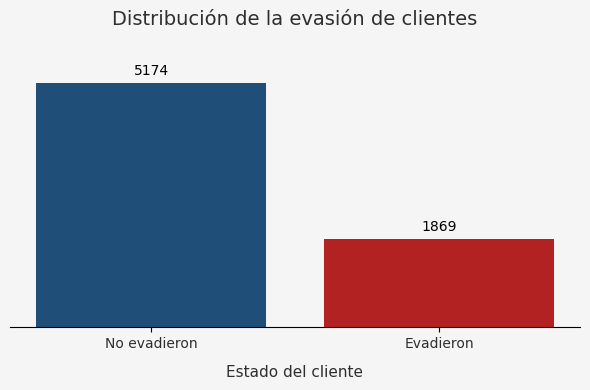

In [98]:
# Etiquetas en español
labels_es = ['No evadieron', 'Evadieron']

# Figura y ejes
fig = plt.figure(figsize=(6, 4))
fig.patch.set_facecolor(COLOR_BG)
ax = plt.gca()
ax.set_facecolor(COLOR_BG)

bars = plt.bar(
    labels_es,
    churn_counts.values,
    color=[COLOR_NO_CHURN, COLOR_CHURN]
)

# Título y etiqueta
plt.title(
    "Distribución de la evasión de clientes",
    fontsize=14,
    color=COLOR_TEXT,
    pad=15
)

plt.xlabel(
    "Estado del cliente",
    fontsize=11,
    color=COLOR_TEXT,
    labelpad=10
)

# Ocultar eje Y
ax.yaxis.set_visible(False)

# Ajuste de ticks
plt.xticks(fontsize=10, color=COLOR_TEXT)

# Eliminar bordes
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Margen superior para evitar corte de texto
ax.set_ylim(0, churn_counts.max() * 1.15)

# Anotaciones
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + churn_counts.max() * 0.02,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color=COLOR_ANNOT
    )

plt.tight_layout()
plt.savefig('/content/figura_01_churn_distribution.png', bbox_inches='tight')
plt.show()

### Evasiones (churn) vs Tipo de contrato

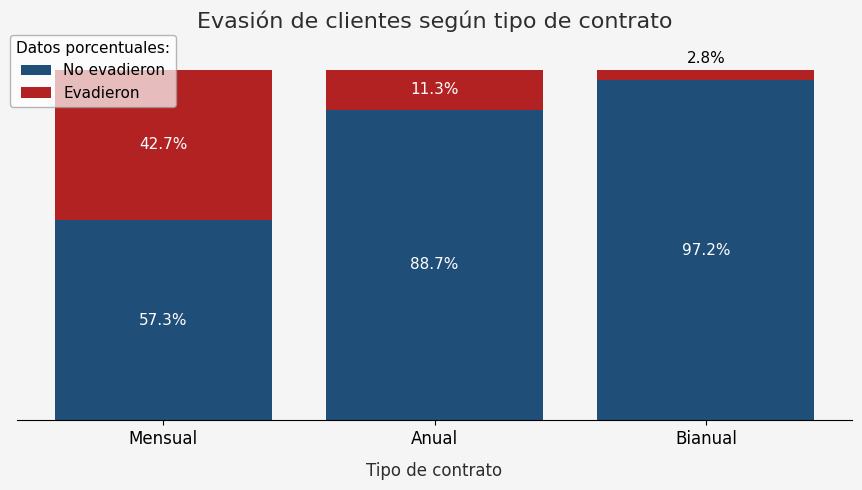

In [99]:
# Reorganizamos la tabla para barras apiladas
contract_pivot = churn_by_contract.pivot(
    index='account_contract',
    columns='churn',
    values='percentage'
)

# Orden lógico
contract_order = ['Month-to-month', 'One year', 'Two year']
contract_pivot = contract_pivot.loc[contract_order]

# Etiquetas en español (solo visual)
labels_es = ['Mensual', 'Anual', 'Bianual']

# Figura
fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

# Barras
ax.bar(
    labels_es,
    contract_pivot['No'],
    color=COLOR_NO_CHURN
)

ax.bar(
    labels_es,
    contract_pivot['Yes'],
    bottom=contract_pivot['No'],
    color=COLOR_CHURN
)

plt.xlabel(
    "Tipo de contrato",
    fontsize=12,
    color=COLOR_TEXT,
    labelpad=10
)

# Anotaciones
for i, contract in enumerate(contract_pivot.index):
    churn_no = contract_pivot.loc[contract, 'No']
    churn_yes = contract_pivot.loc[contract, 'Yes']

    # No evasión (siempre cabe)
    ax.text(
        i,
        churn_no / 2,
        f"{churn_no:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

    # Evasión: condición para valores pequeños
    if churn_yes < 6:
        ax.text(
            i,
            churn_no + churn_yes + 1.2,
            f"{churn_yes:.1f}%",
            ha='center',
            va='bottom',
            fontsize=11,
            color=COLOR_ANNOT
        )
    else:
        ax.text(
            i,
            churn_no + churn_yes / 2,
            f"{churn_yes:.1f}%",
            ha='center',
            va='center',
            fontsize=11,
            color='white'
        )

# Título
ax.set_title(
    'Evasión de clientes según tipo de contrato',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

# Quitar eje Y
ax.set_ylim(0, 105)
ax.tick_params(axis='y', left=False, labelleft=False)

# Estética de ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', labelsize=12)

# Leyenda
ax.legend(
    ['No evadieron', 'Evadieron'],
    title='Datos porcentuales:',
    frameon=True,
    edgecolor='#999999',
    fontsize=11,
    title_fontsize=11,
    loc='center right',
    bbox_to_anchor=(0.2, 0.95),
    framealpha=0.7
)

plt.tight_layout()
plt.savefig('/content/figura_02_contract_churn.png', bbox_inches='tight')
plt.show()

### Evasión vs Método de pago

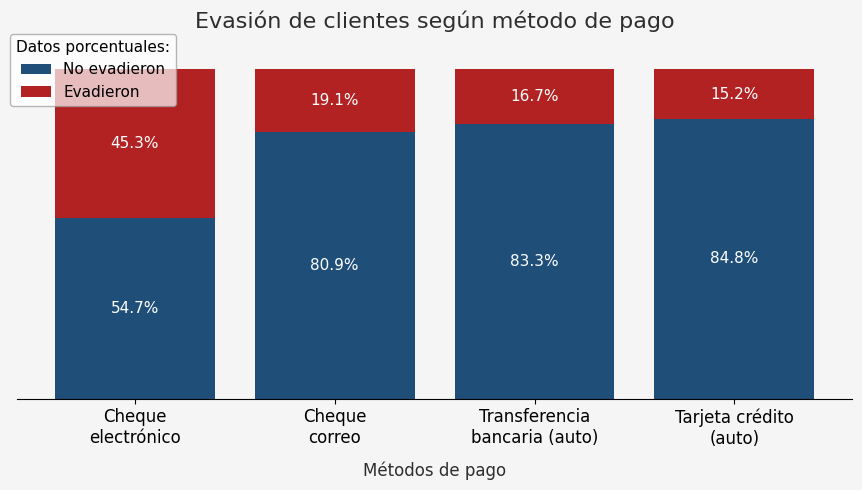

In [100]:
payment_pivot = churn_by_payment.pivot(
    index='account_payment_method',
    columns='churn',
    values='percentage'
)

method_order = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
payment_pivot = payment_pivot.loc[method_order]

labels_es = [
    'Cheque\nelectrónico',
    'Cheque\ncorreo',
    'Transferencia\nbancaria (auto)',
    'Tarjeta crédito\n(auto)'
]

fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

ax.bar(
    labels_es,
    payment_pivot['No'],
    color=COLOR_NO_CHURN
)

ax.bar(
    labels_es,
    payment_pivot['Yes'],
    bottom=payment_pivot['No'],
    color=COLOR_CHURN
)

plt.xlabel(
    "Métodos de pago",
    fontsize=12,
    color=COLOR_TEXT,
    labelpad=10
)

for i, method in enumerate(payment_pivot.index):
    churn_no = payment_pivot.loc[method, 'No']
    churn_yes = payment_pivot.loc[method, 'Yes']

    ax.text(
        i,
        churn_no / 2,
        f"{churn_no:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

    ax.text(
        i,
        churn_no + churn_yes / 2,
        f"{churn_yes:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

ax.set_title(
    'Evasión de clientes según método de pago',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

ax.tick_params(axis='y', left=False, labelleft=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', labelsize=12)

ax.legend(
    ['No evadieron', 'Evadieron'],
    title='Datos porcentuales:',
    frameon=True,
    edgecolor='#999999',
    fontsize=11,
    title_fontsize=11,
    loc='center right',
    bbox_to_anchor=(0.2, 0.95),
    framealpha=0.7
)
plt.tight_layout()
plt.savefig('/content/figura_03_payment_churn.png', bbox_inches='tight')
plt.show()

### Evasión vs Servicio de internet

In [101]:
churn_by_internet_service

,internet_internet_service,churn,count,percentage
0,DSL,No,1962,81.04
1,DSL,Yes,459,18.96
2,Fiber optic,No,1799,58.11
3,Fiber optic,Yes,1297,41.89
4,No,No,1413,92.60
5,No,Yes,113,7.40


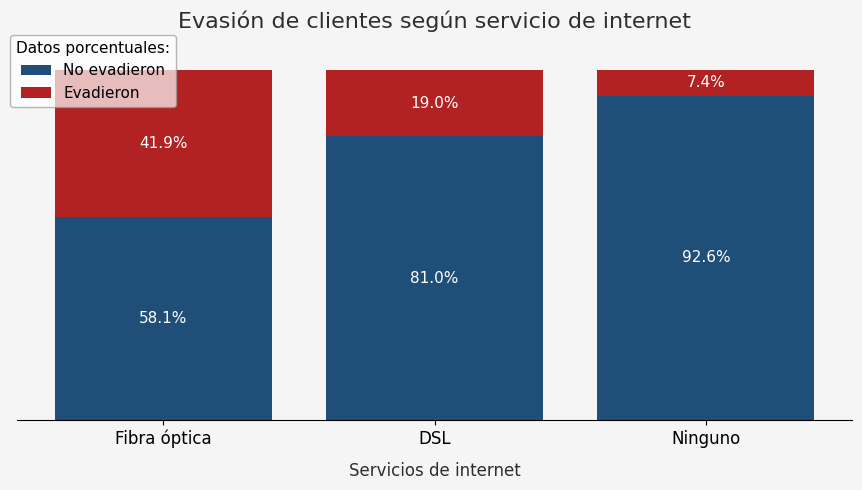

In [102]:
internet_pivot = churn_by_internet_service.pivot(
    index='internet_internet_service',
    columns='churn',
    values='percentage'
)

internet_order = ['Fiber optic', 'DSL', 'No']
internet_pivot = internet_pivot.loc[internet_order]

labels_es = ['Fibra óptica', 'DSL', 'Ninguno']

fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

ax.bar(
    labels_es,
    internet_pivot['No'],
    color=COLOR_NO_CHURN
)

ax.bar(
    labels_es,
    internet_pivot['Yes'],
    bottom=internet_pivot['No'],
    color=COLOR_CHURN
)

plt.xlabel(
    "Servicios de internet",
    fontsize=12,
    color=COLOR_TEXT,
    labelpad=10
)

for i, internet in enumerate(internet_pivot.index):
    churn_no = internet_pivot.loc[internet, 'No']
    churn_yes = internet_pivot.loc[internet, 'Yes']

    ax.text(
        i,
        churn_no / 2,
        f"{churn_no:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

    ax.text(
        i,
        churn_no + churn_yes / 2,
        f"{churn_yes:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color= 'white',
    )

ax.set_title(
    'Evasión de clientes según servicio de internet',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

ax.tick_params(axis='y', left=False, labelleft=False)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=12)

ax.legend(
    ['No evadieron', 'Evadieron'],
    title='Datos porcentuales:',
    frameon=True,
    edgecolor='#999999',
    fontsize=11,
    title_fontsize=11,
    loc = 'center right',
    bbox_to_anchor=(0.2, 0.95),
    framealpha=0.7
)

plt.tight_layout()
plt.savefig('/content/figura_04_internet_churn.png', bbox_inches='tight')
plt.show()

### Evasión vs Facturación sin papel

In [103]:
churn_by_paperless_billing

,account_paperless_billing,churn,count,percentage
0,No,No,2403,83.67
1,No,Yes,469,16.33
2,Yes,No,2771,66.43
3,Yes,Yes,1400,33.57


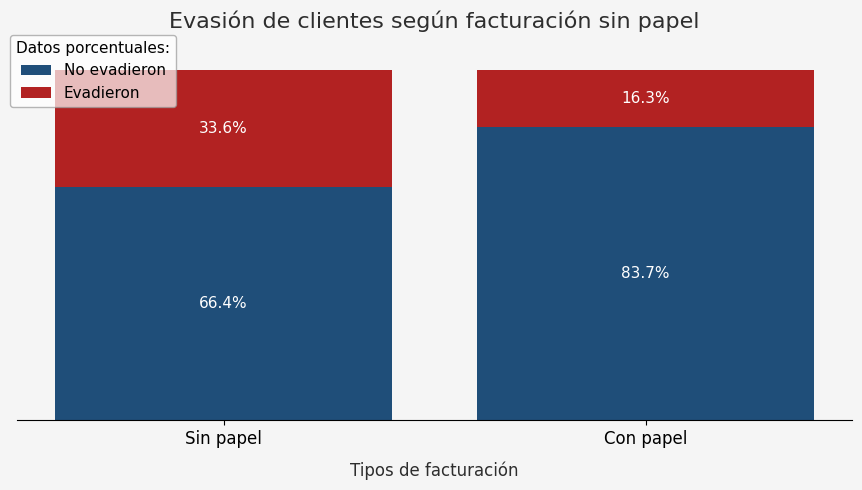

In [104]:
billing_pivot = churn_by_paperless_billing.pivot(
    index= 'account_paperless_billing',
    columns='churn',
    values='percentage'
)

billing_order = ['Yes', 'No']
billing_pivot = billing_pivot.loc[billing_order]

labels_es = ['Sin papel', 'Con papel']

fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

ax.bar(
    labels_es,
    billing_pivot['No'],
    color=COLOR_NO_CHURN
)

ax.bar(
    labels_es,
    billing_pivot['Yes'],
    bottom=billing_pivot['No'],
    color=COLOR_CHURN
)

plt.xlabel(
    "Tipos de facturación",
    fontsize=12,
    color=COLOR_TEXT,
    labelpad=10
)

for i, billing in enumerate(billing_pivot.index):
    churn_no = billing_pivot.loc[billing, 'No']
    churn_yes = billing_pivot.loc[billing, 'Yes']

    ax.text(
        i,
        churn_no / 2,
        f"{churn_no:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

    ax.text(
        i,
        churn_no + churn_yes / 2,
        f"{churn_yes:.1f}%",
        ha='center',
        va='center',
        fontsize=11,
        color='white'
    )

ax.set_title(
    "Evasión de clientes según facturación sin papel",
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

ax.tick_params(axis='y', left=False, labelleft=False)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=12)

ax.legend(
    ['No evadieron', 'Evadieron'],
    title='Datos porcentuales:',
    frameon=True,
    edgecolor='#999999',
    fontsize=11,
    title_fontsize=11,
    loc='center right',
    bbox_to_anchor=(0.2, 0.95),
    framealpha=0.7
)

plt.tight_layout()
plt.savefig('/content/figura_05_paperless_churn.png', bbox_inches='tight')
plt.show()

### Evasión vs Tiempo de contrato

In [105]:
df_churn_rate

,tenure_group,total_customers,churn,churned_customers,churn_rate
0,"(48, 72]",2309,Yes,213,9.22
1,"(24, 48]",1648,Yes,325,19.72
2,"(0, 6]",1525,Yes,784,51.41
3,"(12, 24]",1045,Yes,294,28.13
4,"(6, 12]",729,Yes,253,34.71


In [106]:
tenure_table = df_churn_rate.copy()

tenure_table = tenure_table.drop(columns='churn')

tenure_table['tenure_group'].unique()
tenure_table['tenure_group'] = tenure_table['tenure_group'].astype(str)
tenure_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure_group       5 non-null      object 
 1   total_customers    5 non-null      int64  
 2   churned_customers  5 non-null      int64  
 3   churn_rate         5 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


In [107]:
tenure_order = [
    '(0, 6]',
    '(6, 12]',
    '(12, 24]',
    '(24, 48]',
    '(48, 72]'
]

tenure_table['tenure_group'] = pd.Categorical(
    tenure_table['tenure_group'],
    categories=tenure_order,
    ordered=True
)

tenure_table = tenure_table.sort_values('tenure_group')

In [108]:
tenure_table = tenure_table.rename(columns={
    'tenure_group': 'Antigüedad (meses)',
    'total_customers': 'Total de clientes',
    'churned_customers': 'Clientes evadidos',
    'churn_rate': 'Tasa de evasión (%)'
})
tenure_table

,Antigüedad (meses),Total de clientes,Clientes evadidos,Tasa de evasión (%)
2,"(0, 6]",1525,784,51.41
4,"(6, 12]",729,253,34.71
3,"(12, 24]",1045,294,28.13
1,"(24, 48]",1648,325,19.72
0,"(48, 72]",2309,213,9.22


In [109]:
COLOR_HEADER = '#E9EEF3'      # gris claro
COLOR_BORDER = '#4F4F4F'      # gris oscuro
COLOR_HIGHLIGHT = '#F8D7DA'   # rojo suave

In [110]:
def highlight_max_churn(row):
    if row['Tasa de evasión (%)'] == tenure_table['Tasa de evasión (%)'].max():
        return ['background-color: {}'.format(COLOR_HIGHLIGHT)] * len(row)
    else:
        return [''] * len(row)

In [132]:
styled_table = (
    tenure_table
    .style
    .apply(highlight_max_churn, axis=1)
    .format({'Tasa de evasión (%)': '{:.1f}'})
    .set_properties(**{
        'text-align': 'center',
        'font-size': '12pt'
    })
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', COLOR_HEADER),
                ('font-weight', 'bold'),
                ('text-align', 'center')
            ]
        },
        {
            'selector': 'table',
            'props': [
                ('border', f'3px solid {COLOR_BORDER}')
            ]
        }
    ])
    .hide(axis='index')
)

In [123]:
!pip install dataframe_image
import nest_asyncio
nest_asyncio.apply()
import dataframe_image as dfi

In [133]:
dfi.export(
    styled_table,
    '/content/figura_06_tenure_churn_table.png',
    table_conversion='matplotlib'
)

In [129]:
tenure_plot = df_churn_rate.copy()

tenure_plot = tenure_plot.sort_values('tenure_group')

labels_es = [
    '0–6 meses',
    '6–12 meses',
    '12–24 meses',
    '24–48 meses',
    '48–72 meses'
]

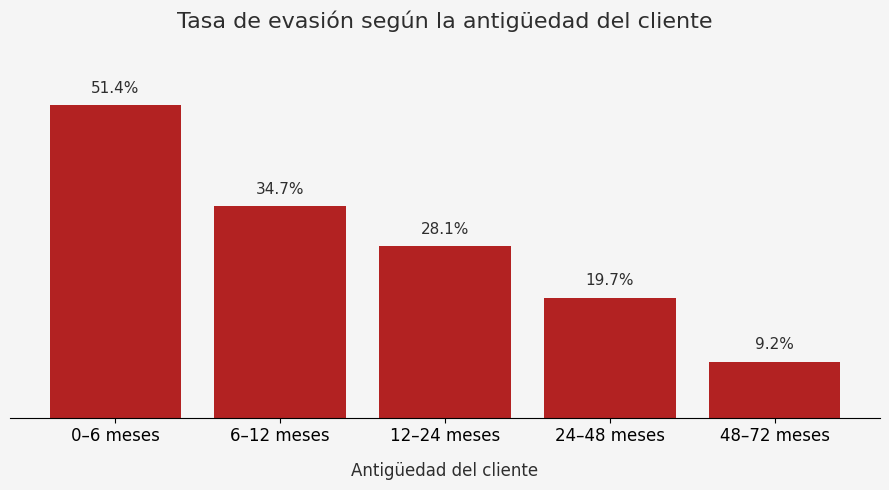

In [130]:
fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

bars = ax.bar(
    labels_es,
    tenure_plot['churn_rate'],
    color=COLOR_CHURN
)

# Anotaciones de porcentaje
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        color=COLOR_TEXT
    )

# Título
ax.set_title(
    'Tasa de evasión según la antigüedad del cliente',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

# Etiquetas
ax.set_xlabel(
    'Antigüedad del cliente',
    fontsize=12,
    labelpad=12,
    color=COLOR_TEXT
)

# Eje Y limpio
ax.set_ylim(0, 60)
ax.tick_params(axis='y', left=False, labelleft=False)
ax.tick_params(axis='x', labelsize=12)

# Estética
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('/content/figura_07_churn_rate_tenure.png', dpi=300, bbox_inches='tight')
plt.show()

### Evasión vs Pago mensual

In [135]:
df_monthly_churn_rate

,charges_monthly_group,total_customers,churn,churned_customers,churn_rate
0,"(17, 30]",1713,Yes,162,9.46
1,"(78, 90]",1195,Yes,432,36.15
2,"(90, 102]",1044,Yes,389,37.26
3,"(66, 78]",964,Yes,346,35.89
4,"(102, 120]",754,Yes,181,24.01
5,"(54, 66]",712,Yes,106,14.89
6,"(42, 54]",644,Yes,187,29.04
7,"(30, 42]",241,Yes,66,27.39


In [139]:
monthly_table = df_monthly_churn_rate.copy()

monthly_table = monthly_table.drop(columns='churn')

monthly_table['charges_monthly_group'].unique()
monthly_table['charges_monthly_group'] = monthly_table['charges_monthly_group'].astype(str)
monthly_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   charges_monthly_group  8 non-null      object 
 1   total_customers        8 non-null      int64  
 2   churned_customers      8 non-null      int64  
 3   churn_rate             8 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [140]:
charges_order = [
    '(17, 30]',
    '(30, 42]',
    '(42, 54]',
    '(54, 66]',
    '(66, 78]',
    '(78, 90]',
    '(90, 102]',
    '(102, 120]'
]

monthly_table['charges_monthly_group'] = pd.Categorical(
    monthly_table['charges_monthly_group'],
    categories=charges_order,
    ordered=True
)

monthly_table = monthly_table.sort_values('charges_monthly_group')
monthly_table

,charges_monthly_group,total_customers,churned_customers,churn_rate
0,"(17, 30]",1713,162,9.46
7,"(30, 42]",241,66,27.39
6,"(42, 54]",644,187,29.04
5,"(54, 66]",712,106,14.89
3,"(66, 78]",964,346,35.89
1,"(78, 90]",1195,432,36.15
2,"(90, 102]",1044,389,37.26
4,"(102, 120]",754,181,24.01


In [141]:
monthly_table = monthly_table.rename(columns={
    'charges_monthly_group': 'Cargos mensuales',
    'total_customers': 'Total de clientes',
    'churned_customers': 'Clientes evadidos',
    'churn_rate': 'Tasa de evasión (%)'
})

monthly_table

,Cargos mensuales,Total de clientes,Clientes evadidos,Tasa de evasión (%)
0,"(17, 30]",1713,162,9.46
7,"(30, 42]",241,66,27.39
6,"(42, 54]",644,187,29.04
5,"(54, 66]",712,106,14.89
3,"(66, 78]",964,346,35.89
1,"(78, 90]",1195,432,36.15
2,"(90, 102]",1044,389,37.26
4,"(102, 120]",754,181,24.01


In [142]:
styled_monthly_table = (
    monthly_table
    .style
    .format({'Tasa de evasión (%)': '{:.1f}'})
    .set_properties(**{
        'text-align': 'center',
        'font-size': '12pt'
    })
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', COLOR_HEADER),
                ('font-weight', 'bold'),
                ('text-align', 'center')
            ]
        },
        {
            'selector': 'table',
            'props': [
                ('border', f'3px solid {COLOR_BORDER}')
            ]
        }
    ])
    .hide(axis='index')
)
styled_monthly_table

Cargos mensuales,Total de clientes,Clientes evadidos,Tasa de evasión (%)
"(17, 30]",1713,162,9.5
"(30, 42]",241,66,27.4
"(42, 54]",644,187,29.0
"(54, 66]",712,106,14.9
"(66, 78]",964,346,35.9
"(78, 90]",1195,432,36.1
"(90, 102]",1044,389,37.3
"(102, 120]",754,181,24.0


In [145]:
dfi.export(
    styled_monthly_table,
    '/content/figura_08_monthly_charges_churn_table.png',
    table_conversion='matplotlib'
)

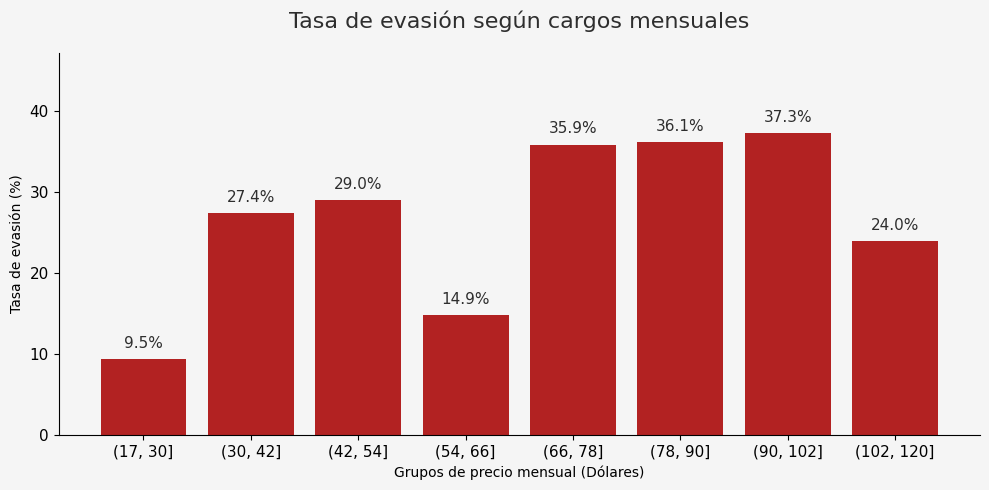

In [150]:
# Figura
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

# Barras
ax.bar(
    monthly_table['Cargos mensuales'],
    monthly_table['Tasa de evasión (%)'],
    color=COLOR_CHURN
)

# Anotaciones
for i, value in enumerate(monthly_table['Tasa de evasión (%)']):
    ax.text(
        i,
        value + 1,
        f'{value:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        color=COLOR_TEXT
    )

# Título
ax.set_title(
    'Tasa de evasión según cargos mensuales',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

# Ejes
ax.set_xlabel('Grupos de precio mensual (Dólares)')
ax.set_ylabel('Tasa de evasión (%)')

ax.set_ylim(0, monthly_table['Tasa de evasión (%)'].max() + 10)

# Estética
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.savefig('/content/figura_09_monthly_charges_churn_rate.png', bbox_inches='tight')
plt.show()

### Evasión vs Pago Total

In [162]:
lost_revenue_table = df_lost_revenue.copy()

# Porcentaje del ingreso total
lost_revenue_table['revenue_pctg'] = (
    lost_revenue_table['total_charges']
    / lost_revenue_table['total_charges'].sum()
    * 100
)

In [163]:
lost_revenue_table = lost_revenue_table[[
    'churn',
    'customers_pctg',
    'total_charges',
    'revenue_pctg',
    'avg_charges_per_person'
]]

In [164]:
lost_revenue_table = lost_revenue_table.rename(columns={
    'churn': 'Estado del cliente',
    'customers_pctg': 'Clientes (%)',
    'total_charges': 'Ingresos totales',
    'revenue_pctg': 'Ingresos (%)',
    'avg_charges_per_person': 'Ingreso promedio por cliente'
})
lost_revenue_table

,Estado del cliente,Clientes (%),Ingresos totales,Ingresos (%),Ingreso promedio por cliente
0,No,71.20,13193241.8,82.169302,2549.911442
1,Yes,25.72,2862926.9,17.830698,1531.796094


In [165]:
lost_revenue_table['Estado del cliente'] = (
    lost_revenue_table['Estado del cliente']
    .map({'No': 'No evadieron', 'Yes': 'Evadieron'})
)
lost_revenue_table

,Estado del cliente,Clientes (%),Ingresos totales,Ingresos (%),Ingreso promedio por cliente
0,No evadieron,71.20,13193241.8,82.169302,2549.911442
1,Evadieron,25.72,2862926.9,17.830698,1531.796094


In [166]:
lost_revenue_table['Clientes (%)'] = lost_revenue_table['Clientes (%)'].round(1)
lost_revenue_table['Ingresos (%)'] = lost_revenue_table['Ingresos (%)'].round(1)
lost_revenue_table['Ingresos totales'] = lost_revenue_table['Ingresos totales'].round(0)
lost_revenue_table['Ingreso promedio por cliente'] = (
    lost_revenue_table['Ingreso promedio por cliente'].round(0)
)
lost_revenue_table

,Estado del cliente,Clientes (%),Ingresos totales,Ingresos (%),Ingreso promedio por cliente
0,No evadieron,71.2,13193242.0,82.2,2550.0
1,Evadieron,25.7,2862927.0,17.8,1532.0


In [167]:
styled_lost_revenue = (
    lost_revenue_table
    .style
    .format({
        'Clientes (%)': '{:.1f}',
        'Ingresos (%)': '{:.1f}',
        'Ingresos totales': '{:,.0f}',
        'Ingreso promedio por cliente': '{:,.0f}'
    })
    .set_properties(**{
        'text-align': 'center',
        'font-size': '12pt'
    })
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', COLOR_HEADER),
                ('font-weight', 'bold'),
                ('text-align', 'center')
            ]
        },
        {
            'selector': 'table',
            'props': [
                ('border', f'3px solid {COLOR_BORDER}')
            ]
        }
    ])
    .hide(axis='index')
)
styled_lost_revenue

Estado del cliente,Clientes (%),Ingresos totales,Ingresos (%),Ingreso promedio por cliente
No evadieron,71.2,"13,193,242",82.2,"2,550"
Evadieron,25.7,"2,862,927",17.8,"1,532"


In [168]:
dfi.export(
    styled_lost_revenue,
    '/content/figura_10_total_charges_churn_table.png',
    table_conversion='matplotlib'
)

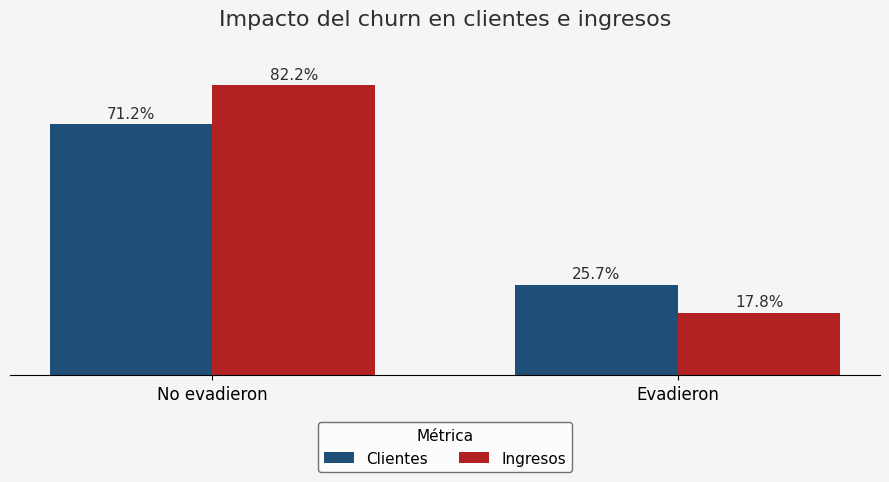

In [170]:
import numpy as np

# Datos
labels = lost_revenue_table['Estado del cliente']
clientes_pct = lost_revenue_table['Clientes (%)']
ingresos_pct = lost_revenue_table['Ingresos (%)']

x = np.arange(len(labels))
width = 0.35

# Figura
fig, ax = plt.subplots(figsize=(9, 5))
fig.patch.set_facecolor(COLOR_BG)
ax.set_facecolor(COLOR_BG)

# Barras
bars_clients = ax.bar(
    x - width/2,
    clientes_pct,
    width,
    label='Clientes',
    color=COLOR_NO_CHURN
)

bars_revenue = ax.bar(
    x + width/2,
    ingresos_pct,
    width,
    label='Ingresos',
    color=COLOR_CHURN
)

# Anotaciones
for bar in bars_clients:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{bar.get_height():.1f}%",
        ha='center',
        va='bottom',
        fontsize=11,
        color=COLOR_TEXT
    )

for bar in bars_revenue:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{bar.get_height():.1f}%",
        ha='center',
        va='bottom',
        fontsize=11,
        color=COLOR_TEXT
    )

# Título
ax.set_title(
    'Impacto del churn en clientes e ingresos',
    fontsize=16,
    pad=18,
    color=COLOR_TEXT
)

# Ejes
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, max(clientes_pct.max(), ingresos_pct.max()) + 10)

ax.tick_params(axis='y', left=False, labelleft=False)

# Estética
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Leyenda
ax.legend(
    title='Métrica',
    frameon=True,
    edgecolor=COLOR_BORDER,
    fontsize=11,
    title_fontsize=11,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=2
)

plt.tight_layout()
plt.savefig('/content/figura_11_lost_revenue_comparison.png', bbox_inches='tight')
plt.show()

##📝 Informe Final

# Introducción

La evasión de clientes representa un reto crítico para empresas basadas en subscripciones y ya que retener clientes es más rentable que adquirir nuevos, entender los factores que influencian el retiro de los clientes es esencial para establecer estrategias de retención y así proteger los ingresos a largo plazo.

El objetivo de este análisis es explorar el comportamiento de lo clientes y los patrones asociados con el retiro del servicio, a través de utilizar las variables tanto categóricas como numéricas que describen al cliente en la base de datos. Para esto se utiliza análisis exploratorio de datos y ETL, con el fin de identificar las características clave de los clientes que tienen mayor probabilidad de cancelar el servicio y poder brindar información útil para respaldar la toma de decisiones basada en datos.

# Limpieza y tratamiento de Datos

El conjunto de los datos fue importado desde el tipo de archivo JSON, este fue normalizado y luego revisado para entender su estructura y los tipos de datos que posee. Entre las características del DataFrame se encuentran variables numéricas como el tiempo de contrato del cliente, el precio mensual del servicio y el precio total pagado a través del ciclo de vida del mismo, estas fueron validadas y tranformados (cuando fue necesario) para asegurar la presición del análisis.

Los valores faltantes o incosistentes también fueron revisados, a estos se les realizó el debido proceso de limpieza de datos para mantener la integridad de los datos. Adicionalmente, las variables categóricas fueron estandarizadas para permitir agrupaciones consistentes durante el análisis.

Estos pasos de procesamiento del DataFrame nos aseguran que el conjunto de datos está en condiciones confiables para realizar el análisis exploratorio.

# Análisis exploratorio de Datos

La fase del análisis exploratorio de datos se centra en la identificación de patrones, tendencias y relaciones entre las características del cliente y el comportamiento de las evasiones. A través de analizar variables tanto categóricas como numéricas, el objetivo es entender cómo los diferentes atributos de los clientes influyen en la probabilidad de la cancelación del servicio.

Las variables categóricas fueron analizadas para identificar los segmentos de clientes con las mayores tasas de abandono, mientras que las variables numéricas se exploraron para evaluar cómo los factores continuos como el tiempo de contrato, el precio mensual y el precio total están relacionados con la retención del cliente.

Este análisis proporciona una base basada en datos para identificar factores de riesgo clave y relpalda el desarrollo de estrategias de retención específicas.

## Distribución de las evasiones
**Figura 1. Distribución de evasión de clientes**





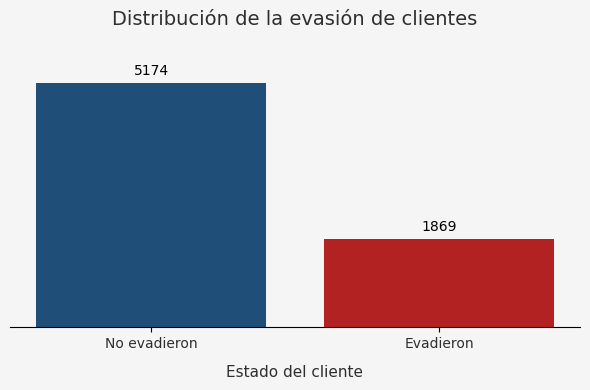

In [112]:
from IPython.display import Image, display
display(Image(filename='/content/figura_01_churn_distribution.png'))

Esta visualización muestra la distribución general de la evasión de los clientes en el conjunto de datos. Aunque la mayoría de los clientes permanece activa, se observa una proporción significativa de evasiones, lo que confirma que la cancelación del servicio representa un problema relevante para la empresa y justifica un análisis más detallado de los factores asociados a este comportamiento.

## Evasiones vs variables categóricas

El análisis de las variables categóricas permite identificar cómo determinadas características estructurales del servicio y del modelo de negocio influyen en el comportamiento de evasión de los clientes. A través de estas variables es posible segmentar la base de usuarios y reconocer perfiles con mayor propensión al abandono, asociados principalmente a decisiones contractuales, métodos de pago y tipos de servicio adquiridos. Este tipo de análisis resulta clave para comprender patrones de churn desde una perspectiva operativa y comercial, ya que muchas de estas características pueden ser gestionadas directamente por la empresa mediante estrategias de fidelización, ajustes en la oferta o mejoras en la experiencia del cliente. En esta sección se analizan las variables categóricas más relevantes, evaluando su relación con la evasión mediante distribuciones porcentuales y comparaciones visuales claras.

### Evasiones vs Tipo de contrato
Figura 2. Evasiones vs Tipo de contrato

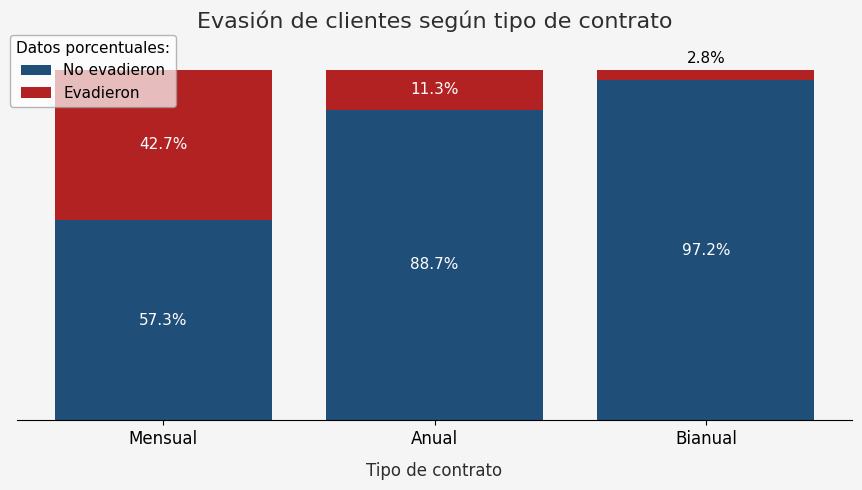

In [113]:
display(Image(filename='/content/figura_02_contract_churn.png'))

La evasión de clientes se concentra principalmente en los contrato mensuales, donde cerca del 43% de los clientes abandona el servicio. En contraste, los contratos de uno y dos años presentan tasas de churn significativamente menores, lo que evidencia que el nivel de compromiso es un factor determinante en la retención del cliente.

### Evasiones vs Método de pago
Figura 3. Evasiones vs Método de pago

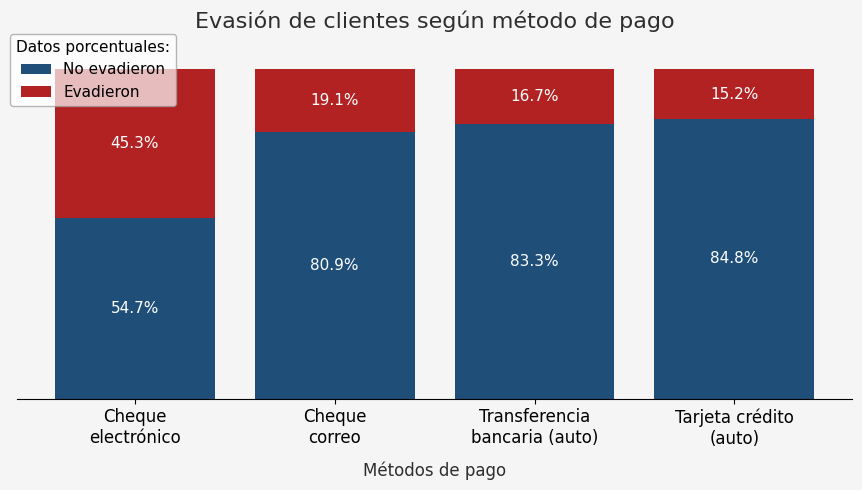

In [114]:
display(Image(filename='/content/figura_03_payment_churn.png'))

Se observa que los clientes que utilizan el cheque electrónico presentan una proporción de evasión del servicio significativamente mayor en comparación con aquellos que emplean métodos de pago automáticos como tranferencia bancaria o tarjeta de crédito.

### Evasiones vs Servicio de internet
Figura 4. Evasiones vs Servicio de internet

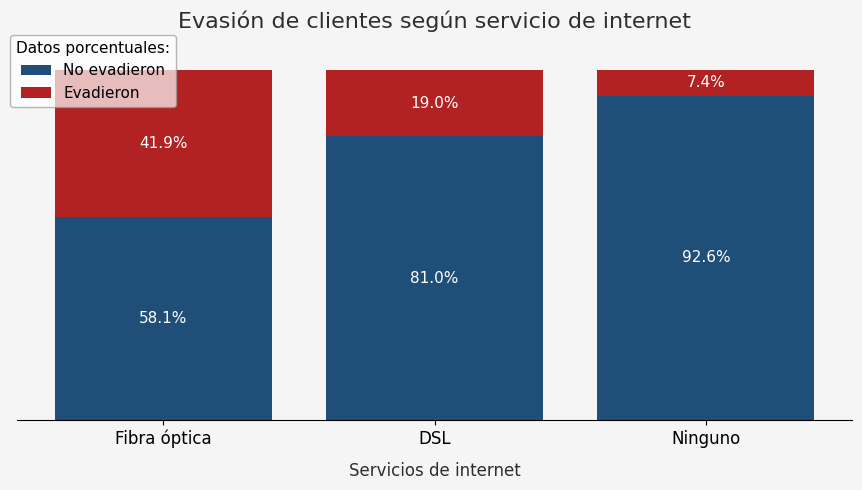

In [115]:
display(Image(filename='/content/figura_04_internet_churn.png'))

Los clientes que cuentan con servicio de fibra óptiva presentan una tasa de evasión mayor que aquellos con DSL o sin servicio de internet.

Una mayor calidad tecnológica no garantiza menor evasión del servicio si la experiencia percibida no es consistente con el precio.

### Evasiones vs Facturación sin papel
Figura 5. Evasiones vs Facturación sin papel

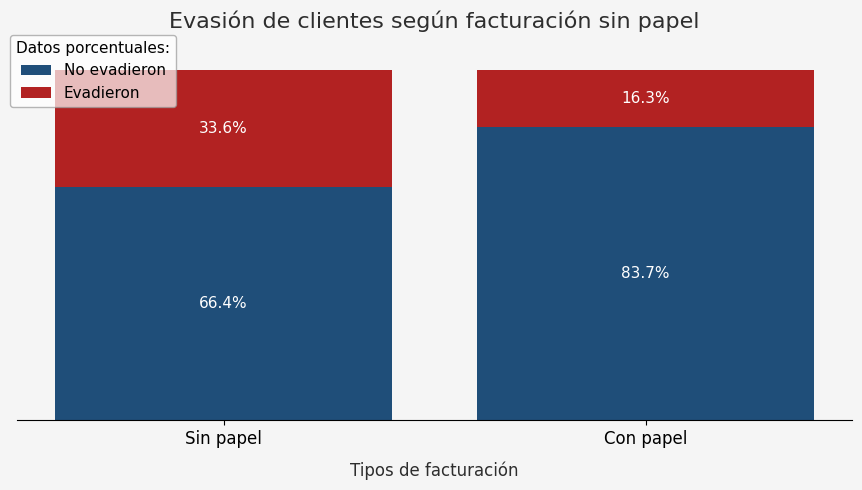

In [116]:
display(Image(filename='/content/figura_05_paperless_churn.png'))

Se evidencia que los clientes con facturación sin papel presentan una tasa de evasión considerablemente mayor que aquellos que reciben facturación en papel. Mientras que solo el 16% de los clientes con facturación física abandona el servicio, la evasión en clientes con facturación digital asciende a aproximadamente 34%, lo que sugiere que los perfiles más digitalizados tienden a mostrar una menor permanencia en el servicio.

El análisis de las variables categóricas permite identificar patrones claros en los segmentos de clientes con mayor propensión a la evasión del servicio. En particular, los contratos mensuales, el uso del cheque electrónico como método de pago, la contratación de servicios de internet de fibra óptica y la facturación sin papel se asocian de manera consistente con tasas de churn más elevadas. Estos resultados sugieren que los clientes con menor nivel de compromiso contractual, mayor flexibilidad operativa o perfiles más digitalizados presentan una mayor probabilidad de abandono. En conjunto, las variables categóricas analizadas reflejan que el churn no depende de un único factor aislado, sino de una combinación de decisiones contractuales, tecnológicas y operativas que influyen en la percepción del valor y en la permanencia del cliente.

## Evasiones vs variables numéricas

El análisis de las variables numéricas se enfoca en evaluar cómo factores cuantitativos asociados al comportamiento del cliente, como el tiempo de permanencia en el servicio y los cargos económicos, se relacionan con la probabilidad de evasión. A diferencia de las variables categóricas, estas variables permiten observar tendencias continuas, identificar concentraciones de riesgo y analizar la magnitud del impacto económico del churn. A través de distribuciones, comparaciones entre clientes que evaden y no evaden, y agrupaciones por rangos, este análisis proporciona una visión más profunda del ciclo de vida del cliente y del valor que aporta la empresa. Los resultados obtenidos permiten no solo identificar perfiles con mayor riesgo de abandono, sino también cuantificar el impacto financiero asociado a dichas pérdidas.

### Evasión vs Tiempo de contrato

Tiempo de contrato (tenure) es una de las variables más relevantes para el análisis de evasión, ya que refleja la duración de la relación entre el cliente y la empresa. Analizar el churn en función del tiempo de contrato permite identificar periodos críticos en los que los clientes presentan una mayor probabilidad de abandonar el servicio, así como evaluar si la retención mejora a medida que aumenta el nivel de permanencia. Este análisis es fundamental para comprender el ciclo de vida del clientes y para orientar estrategias de renteción enfocadas en las etapas de mayor riesgo.

Tabla 1. Porcentaje de evasión segmentada en grupos de antigüedad (meses)



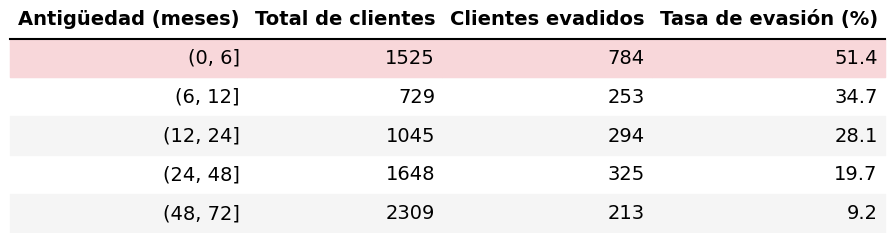

In [134]:
display(Image(filename='/content/figura_06_tenure_churn_table.png'))

Figura 6. Evasión vs Tiempo de contrato

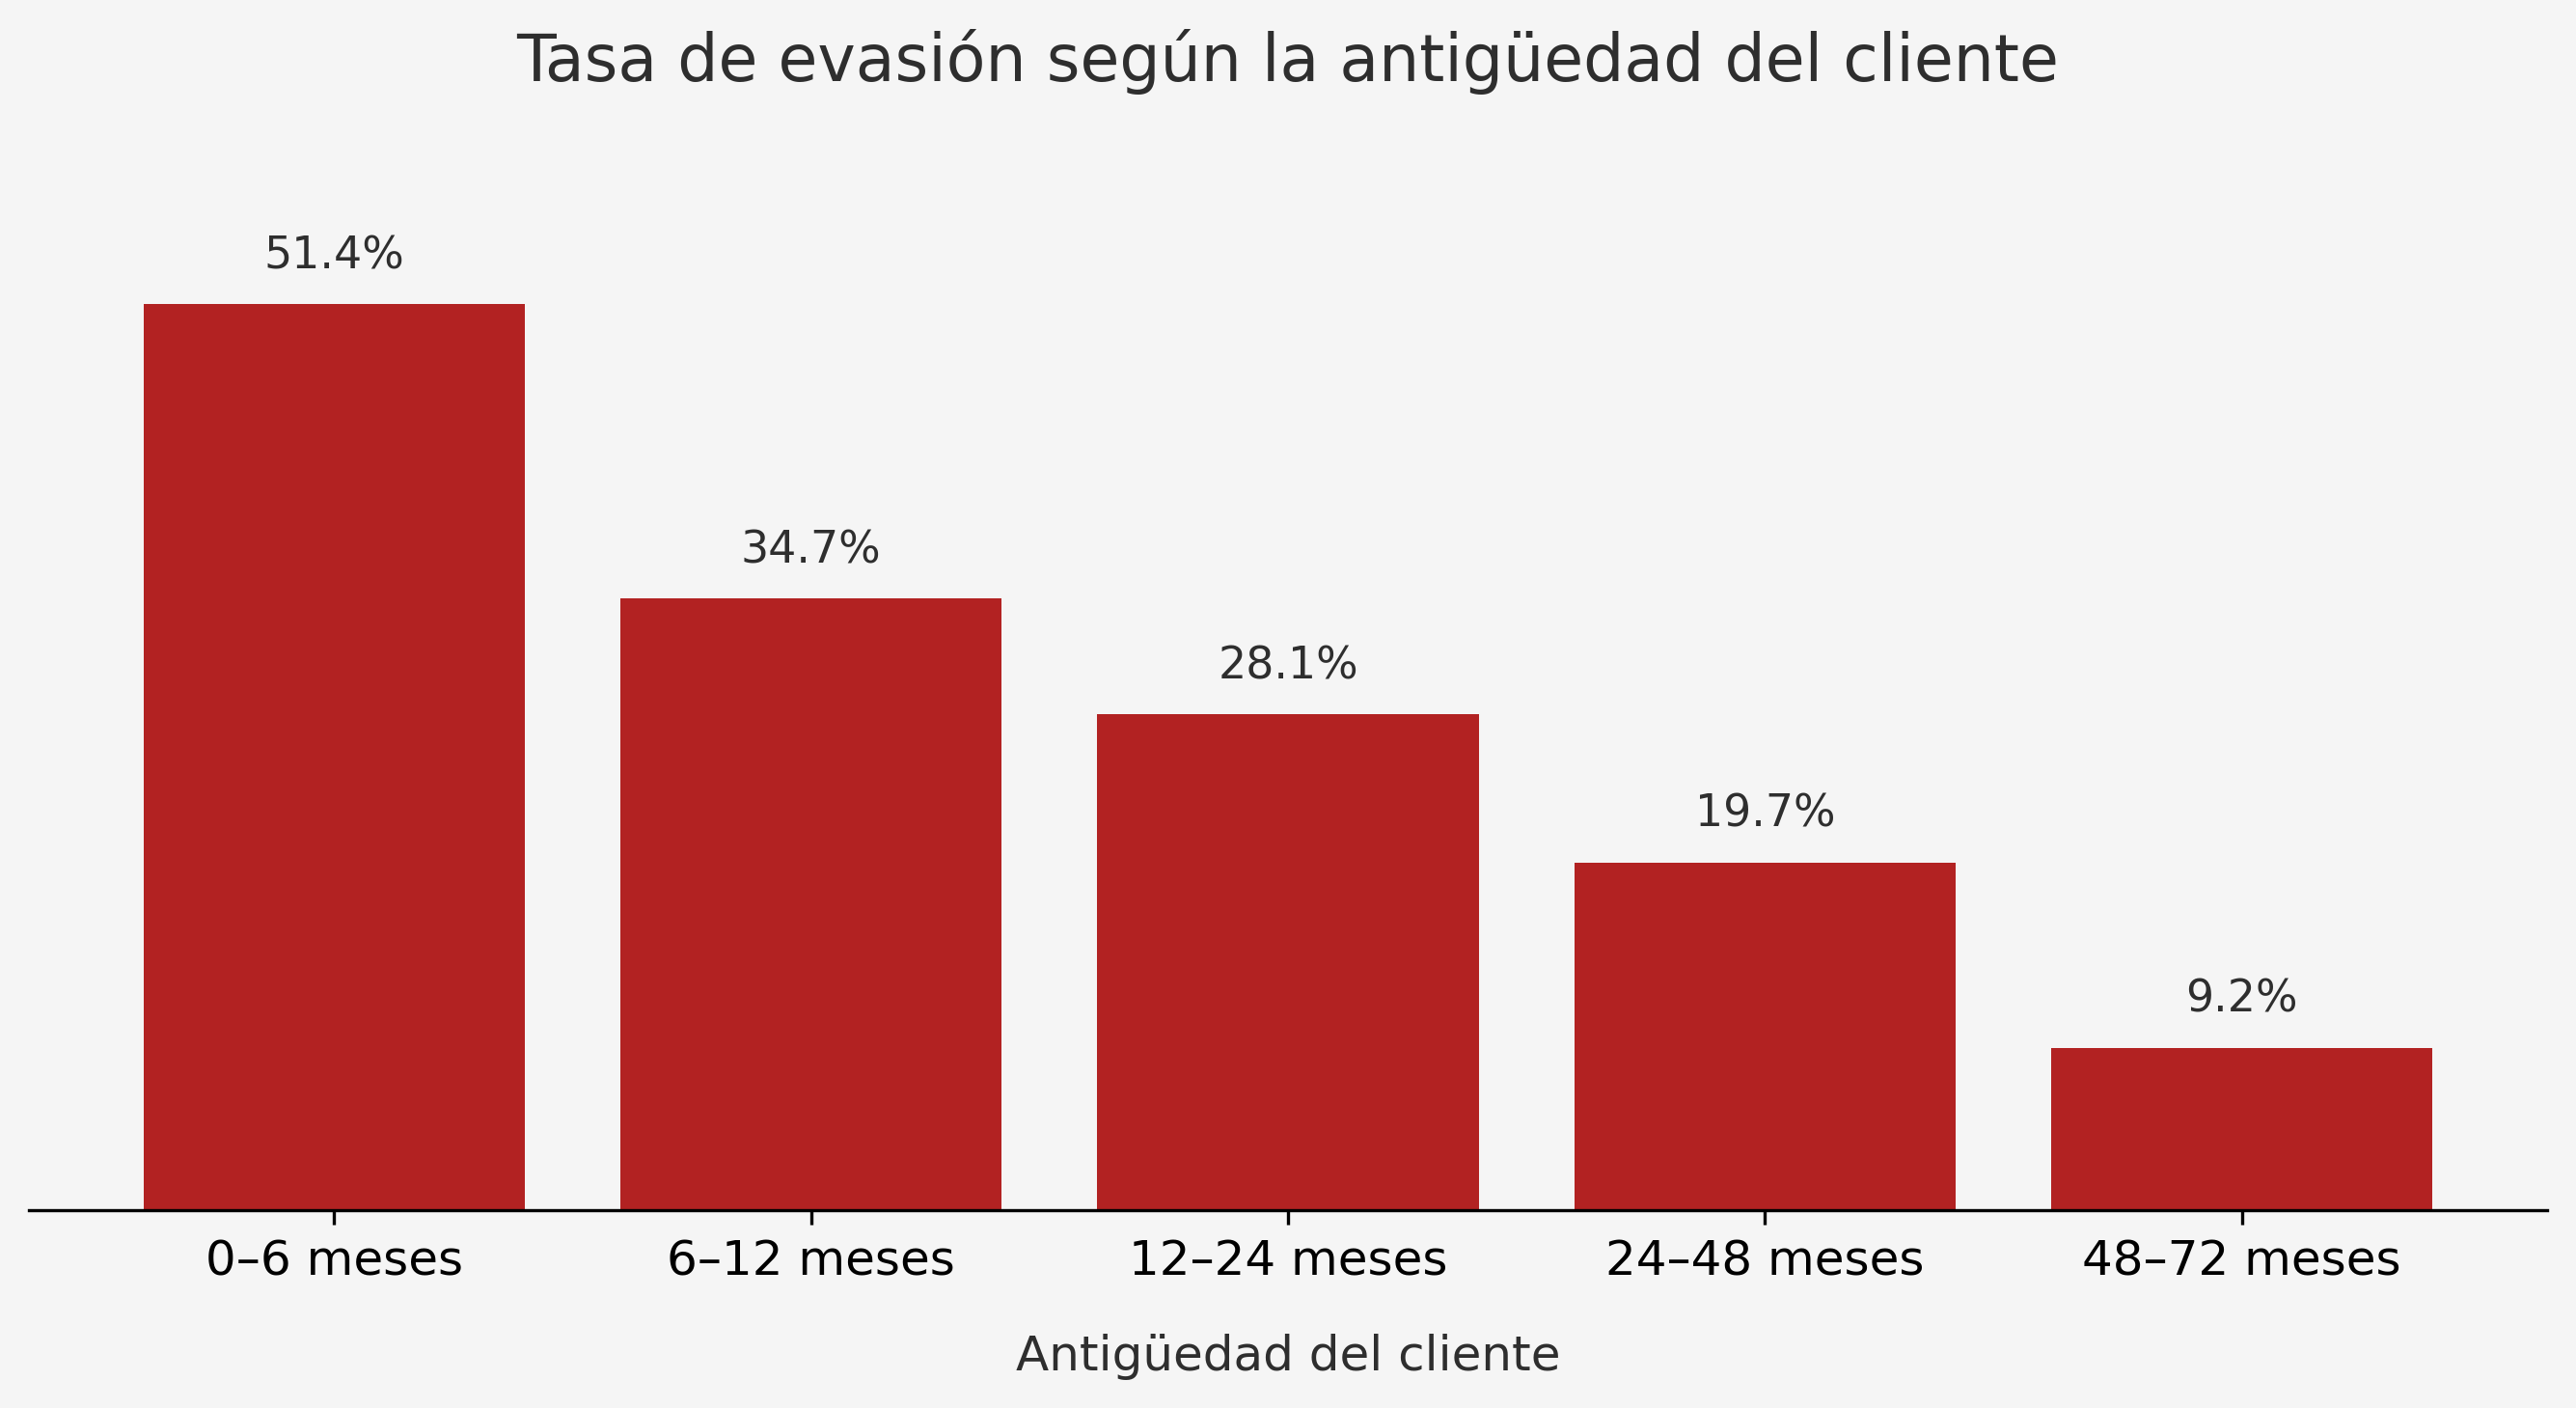

In [131]:
display(Image(filename='/content/figura_07_churn_rate_tenure.png'))

La tasa de evasión es significativamente más alta durante los primeros meses de relación con el servicio. Los clientes con una antigüedad entre 0 y 6 meses presentan una probabilidad de abandono superior al 50%, lo que evidencia un alto riesgo en la etapa inicial del ciclo de vida del cliente. A medida que aumenta la antigüedad, la tasa de churn disminuye de forma progresiva, estabilizándose en valores bajos para clientes con más de 48 meses de permanencia. Este comportamiento sugiere que las estrategias de retención deben enfocarse prioritariamente en los primeros meses posteriores a la adquisición.

## Evasión vs Pago mensual

El análisis de los cargos mensuales permite evaluar la relación entre el precio que paga el cliente y su probabilidad de evasión. Esta variable es clave dentro del modelo de negocio, ya que refleja directamente el valor económico percibido del servicio y su alineación con la experiencia ofrecida. Comprender cómo varía la tasa de churn según distintos rangos de facturación mensual permite identificar umbrales de precio donde el riesgo de abandono se incrementa.

Tabla 2. Porcentaje de evasión segmentada en grupos de precios mensuales (dólares)

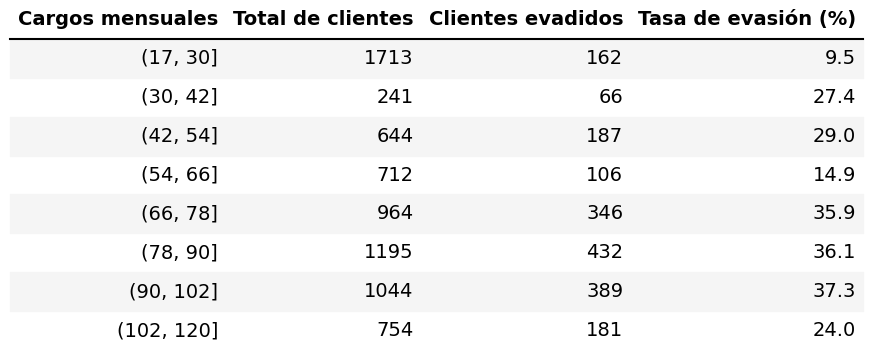

In [146]:
display(Image(filename='/content/figura_08_monthly_charges_churn_table.png'))

Figura 7. Evasión vs Pago mensual

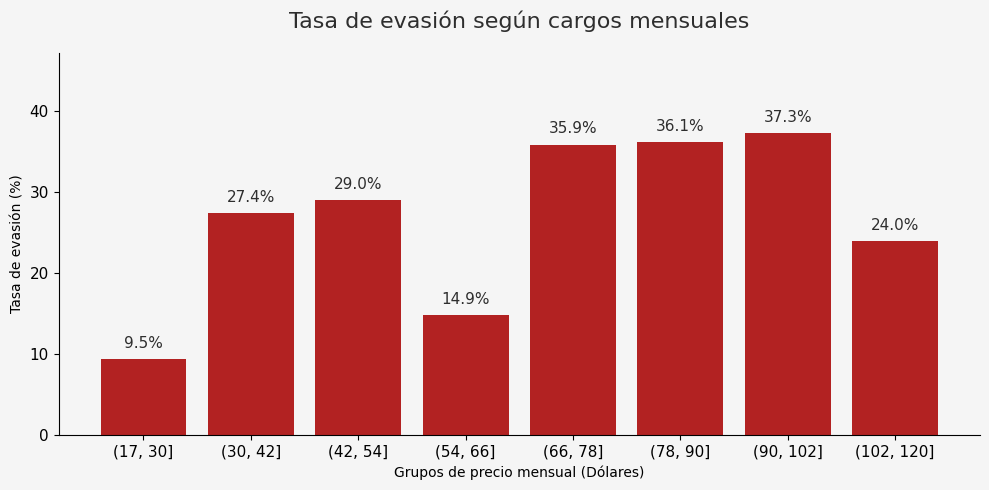

In [151]:
display(Image(filename='/content/figura_09_monthly_charges_churn_rate.png'))

Se observa que la tasa de evasión aumenta significativamente en los rangos de cargos mensuales medios y altos, alcanzando valores cercanos al 36–37% en clientes con facturación entre aproximadamente 66 y 102 dólares mensuales. En contraste, los clientes con cargos bajos presentan tasas de churn considerablemente menores, cercanas al 10%.

Este comportamiento sugiere que el precio, por sí solo, no explica la retención del cliente, sino que debe estar acompañado de una percepción clara de valor. A partir de ciertos niveles de facturación, los clientes parecen ser más sensibles a la relación costo–beneficio, lo que incrementa la probabilidad de abandono si el servicio no cumple sus expectativas.

## Evasión vs Pago total

El análisis de la variable Total Charges permite evaluar el impacto económico real de la evasión de clientes, integrando tanto el tiempo de permanencia como el valor mensual del servicio. A diferencia de otras variables analizadas, esta métrica no es independiente, ya que está directamente influenciada por la antigüedad del cliente y su nivel de consumo. Por esta razón, su análisis resulta clave para comprender no solo quiénes abandonan el servicio, sino qué nivel de ingresos representa dicha evasión para la empresa. Este enfoque permite identificar si el churn se concentra en clientes de bajo valor económico o si, por el contrario, implica una pérdida significativa de ingresos acumulados.

Tabla 3. Ingresos porcentuales de cada estado del cliente

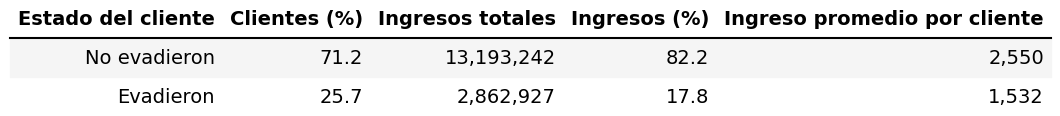

In [169]:
display(Image(filename='/content/figura_10_total_charges_churn_table.png'))

Figura 8. Evasión vs Pago total



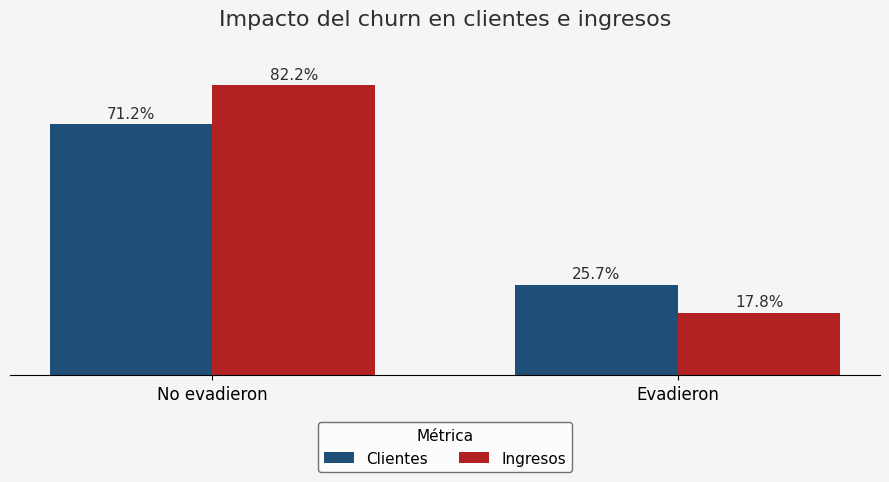

In [173]:
display(Image(filename='/content/figura_11_lost_revenue_comparison.png'))

El análisis evidencia que, aunque los clientes que evaden el servicio representan aproximadamente una cuarta parte de la base total, su contribución al ingreso acumulado es proporcionalmente menor. Esto indica que la evasión se concentra principalmente en clientes con menor valor económico total, generalmente asociados a una menor antigüedad y a menores cargos acumulados. Sin embargo, la presencia de clientes evadidos con valores elevados de Total Charges sugiere la existencia de casos excepcionales de alto valor que abandonan el servicio, lo cual representa una pérdida estratégica relevante. Estos resultados resaltan la importancia de implementar estrategias de retención temprana, enfocadas en convertir clientes nuevos en relaciones de largo plazo que maximicen su valor a lo largo del tiempo.

# Conlusiones e insights

A partir del análisis exploratorio de los datos, se identificaron patrones claros que permiten comprender los principales factores asociados a la evasión de clientes. En primer lugar, la antigüedad del cliente emerge como una de las variables más determinantes, evidenciando que los primeros meses de permanencia concentran los mayores niveles de churn. Asimismo, los contratos mensuales presentan tasas de evasión significativamente superiores en comparación con contratos de mayor duración, lo que confirma que el nivel de compromiso contractual influye directamente en la retención.

Desde el punto de vista económico, se observó que los cargos mensuales más elevados están asociados a mayores tasas de evasión, lo que sugiere una percepción de desalineación entre el precio del servicio y el valor recibido. No obstante, al analizar el impacto económico acumulado mediante la variable Cargos Totales, se concluye que la mayor parte de la evasión corresponde a clientes de bajo valor económico total, principalmente debido a su corta permanencia en el servicio.

Finalmente, las variables categóricas relacionadas con el método de pago, el tipo de contrato, el servicio de internet y la facturación sin papel aportan evidencia adicional sobre comportamientos de riesgo específicos, permitiendo segmentar a los clientes según su probabilidad de evasión y facilitar la toma de decisiones estratégicas basadas en datos.

# Recomendaciones

Con base en los hallazgos obtenidos, se proponen las siguientes recomendaciones estratégicas:

1. Fortalecer la retención en los primeros meses del servicio, implementando programas de acompañamiento, beneficios iniciales o comunicaciones personalizadas que refuercen el valor percibido durante la etapa crítica de incorporación del cliente.

2. Incentivar la migración hacia contratos de mayor duración, mediante descuentos, beneficios exclusivos o mejoras en el servicio, con el fin de aumentar el compromiso del cliente y reducir la probabilidad de evasión.

3. Revisar la estructura de precios de los planes con cargos mensuales elevados, asegurando que la experiencia y calidad del servicio estén alineadas con el valor económico percibido por el cliente.

4. Promover métodos de pago automáticos, ya que se asocian con menores tasas de cancelación del servicio, reduciendo fricciones operativas y fortaleciendo la continuidad del servicio.

5. Identificar clientes de alto valor económico en riesgo de evasión, utilizando métricas como Precio Total y antigüedad, para aplicar estrategias de retención personalizadas que protejan los ingresos más relevantes para la empresa.